In [25]:
# Imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
from math import log10, floor
from sympy import *
from scipy.special import factorial
import glob
import math


x, y, z = symbols("x y z")


In [26]:
image_location = r"lightcurves\*"
filenames = sorted(glob.glob(image_location))
filenames[0]

'lightcurves\\09alu_lc.dat'

<Figure size 900x600 with 0 Axes>

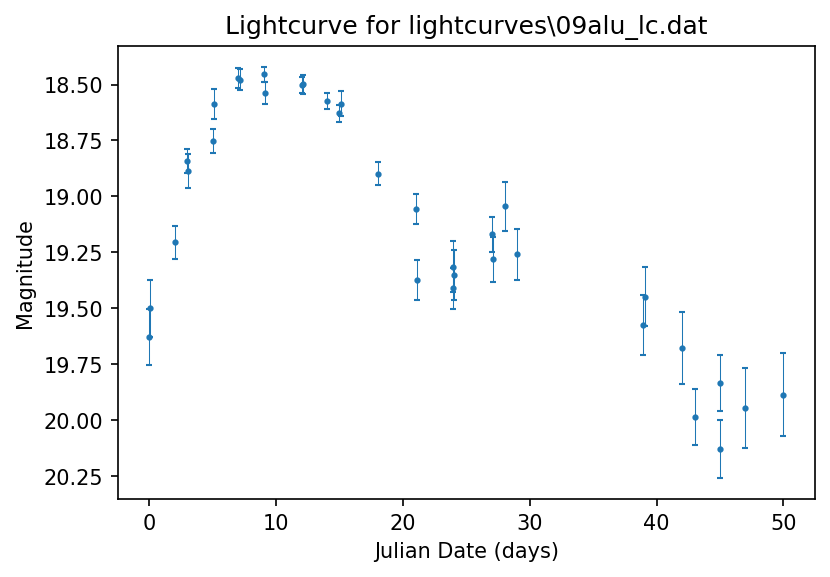

In [42]:
#create a single lightcurve with error bars
data = np.genfromtxt(filenames[0], skip_footer=1,usecols=(0,2,3))

plt.figure(dpi=150)

fig, ax = plt.subplots(dpi = 150)
time_values = data[:,0]
magnitudes = data[:,1]
magnitude_uncertainties = data[:,2]

x = time_values - time_values[0]
y = magnitudes
y_errors = magnitude_uncertainties

plt.errorbar(x,y, yerr = y_errors, marker = "o", linestyle="none", markersize = 2, capsize = 1.5, elinewidth = 0.5)
titletext = "Lightcurve for " + filenames[0]
plt.title(titletext)
plt.xlabel("Julian Date (days)")
plt.ylabel("Magnitude")
ax.invert_yaxis()

plt.show()


[ 0.740608  1.110912 21.107328 21.477632 21.847936 22.21824  22.588544
 22.958848 23.329152 24.06976  24.440064 31.47584  31.846144 32.216448
 32.586752 32.957056 33.32736  33.697664 34.067968]
rising: 0.9257599999955684
falling: 27.424278588104013
risetime: 8.13
falltime: 18.37


<Figure size 900x600 with 0 Axes>

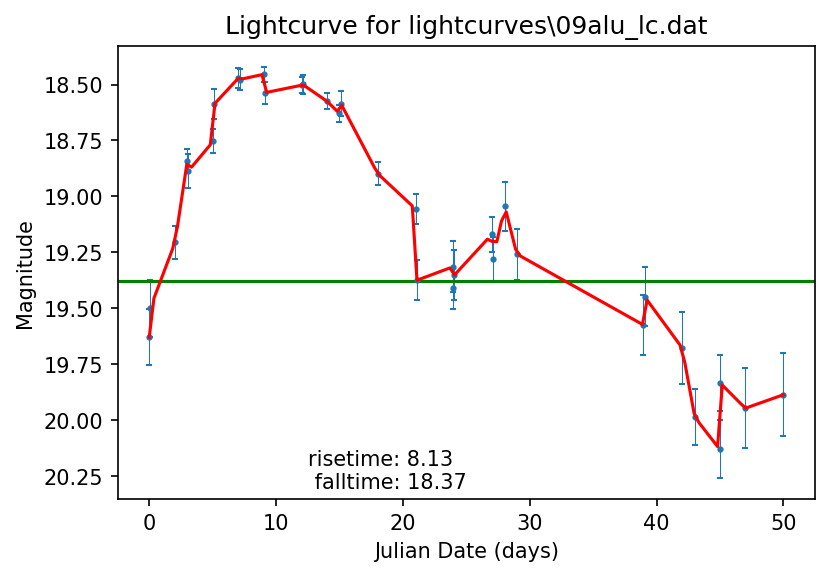

In [96]:
#create a single lightcurve with interpolation
data = np.genfromtxt(filenames[0], skip_footer=1,usecols=(0,2,3))

plt.figure(dpi=150)


# plot the data
fig, ax = plt.subplots(dpi = 150)
time_values = data[:,0]
magnitudes = data[:,1]
magnitude_uncertainties = data[:,2]

x = time_values - time_values[0]
y = magnitudes
y_errors = magnitude_uncertainties

plt.errorbar(x,y, yerr = y_errors, marker = "o", linestyle="none", markersize = 2, capsize = 1.5, elinewidth = 0.5)
titletext = "Lightcurve for " + filenames[0]
plt.title(titletext)
plt.xlabel("Julian Date (days)")
plt.ylabel("Magnitude")
ax.invert_yaxis()

# calculate and plot the interpolation
interp_xvals = np.linspace(0, np.max(x), np.size(x)*4)
interp_yvals = np.interp(interp_xvals, x, y)

plt.errorbar(interp_xvals, interp_yvals, color="r")

peak_magnitude = np.max(y)
max_index = np.argwhere(y == np.min(y))
half_brightness = peak_magnitude - 2.5 * np.log10(2)
# print(half_brightness)
plt.axhline(half_brightness, color="g")

good_xvals = np.array([])
for i, xval in enumerate(interp_xvals):
    if np.abs(interp_yvals[i] - half_brightness) < 0.05:
        good_xvals = np.append(good_xvals, xval)

print(good_xvals)

half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<max_index)[:,1]])
half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>max_index)[:,1]])

print(f"rising: {half_rising_JD}")
print(f"falling: {half_falling_JD}")

risetime = float(x[max_index]) - half_rising_JD
falltime = half_falling_JD - float(x[max_index])

risetime = round(risetime, 2)
falltime = round(falltime, 2)

print(f"risetime: {risetime}")
print(f"falltime: {falltime}")


textstr = f'risetime: {risetime} \n falltime: {falltime}'
ax.text(np.max(x) / 4, np.max(y), textstr, verticalalignment = 'top')


plt.show()


In [76]:
good_xvals[np.argwhere(good_xvals>max_index)[:,1]]

array([21.107328, 21.477632, 21.847936, 22.21824 , 22.588544, 22.958848,
       23.329152, 24.06976 , 24.440064, 31.47584 , 31.846144, 32.216448,
       32.586752, 32.957056, 33.32736 , 33.697664, 34.067968])

In [55]:
testarr = np.array([])
testarr = np.append(testarr, 5)
testarr

array([5.])

In [59]:
np.argwhere(y == np.max(y))

array([[30]], dtype=int64)

In [61]:
np.max(y)

20.1299

1.932346930683819


<Figure size 900x600 with 0 Axes>

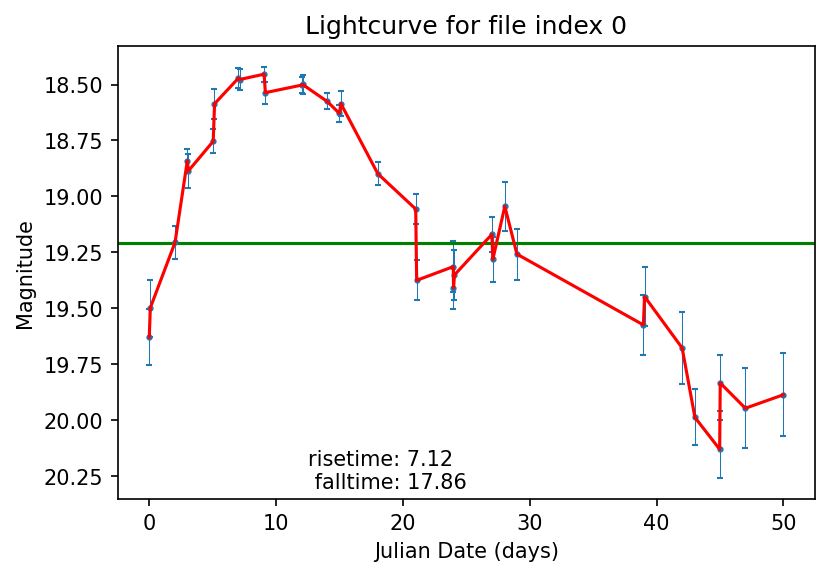

nan


<Figure size 900x600 with 0 Axes>

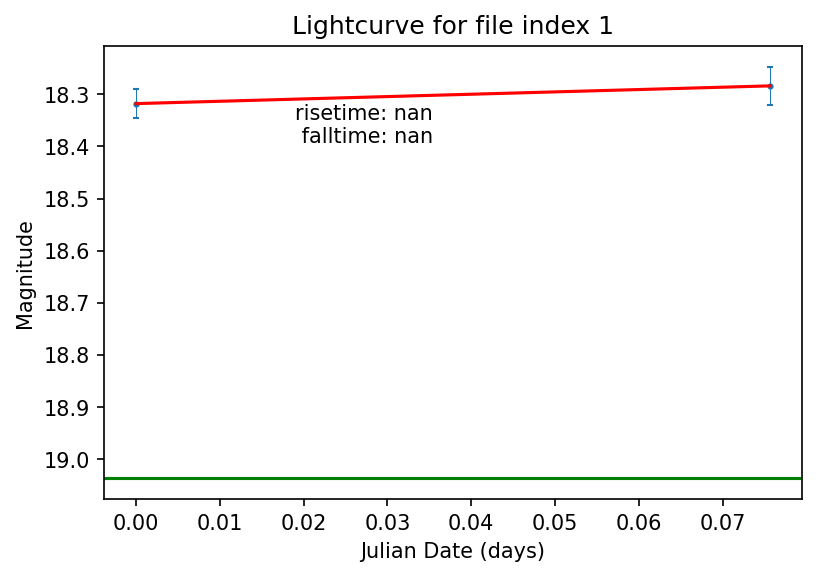

nan


<Figure size 900x600 with 0 Axes>

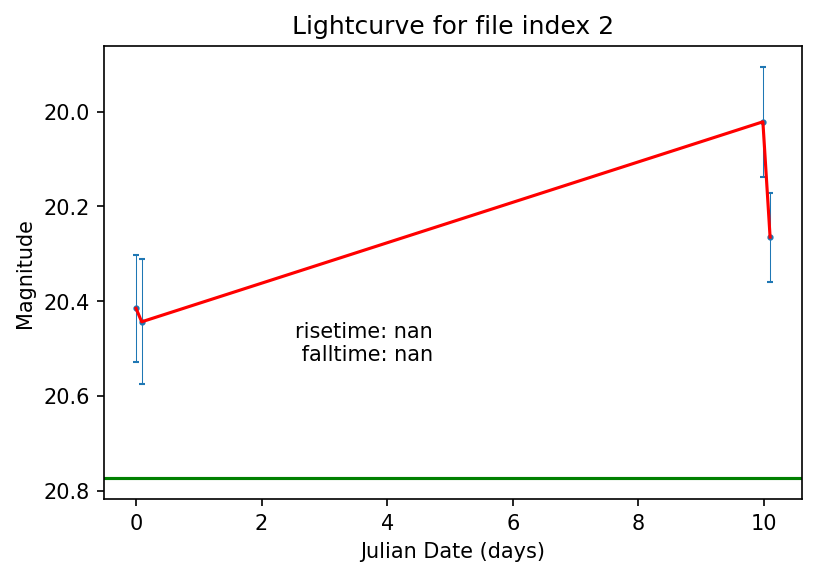

nan


<Figure size 900x600 with 0 Axes>

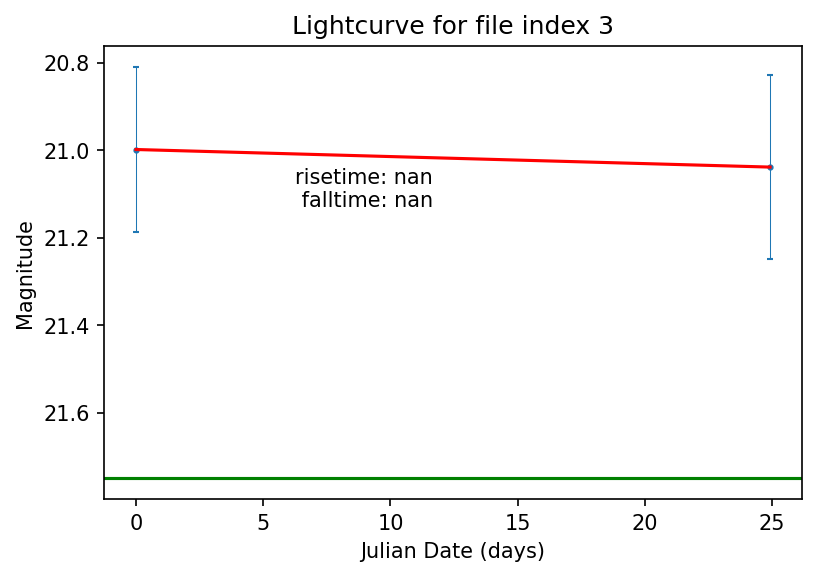

21.4312227722949


<Figure size 900x600 with 0 Axes>

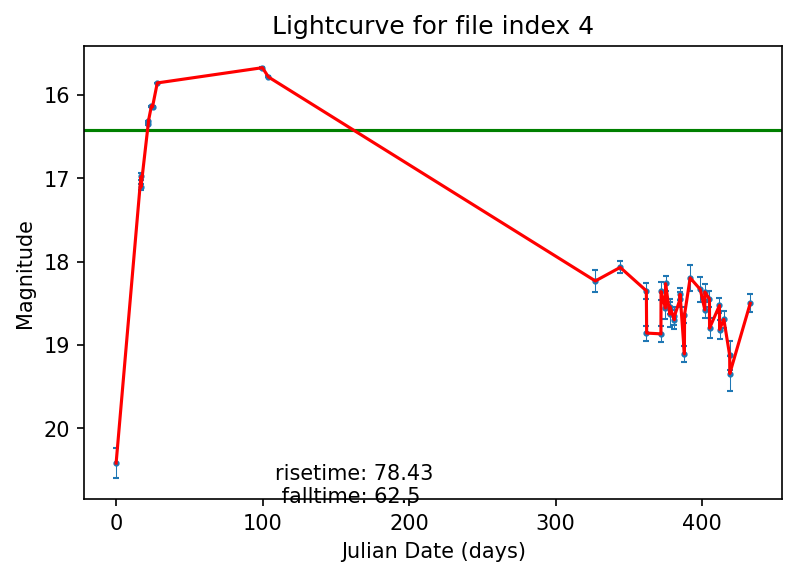

nan


<Figure size 900x600 with 0 Axes>

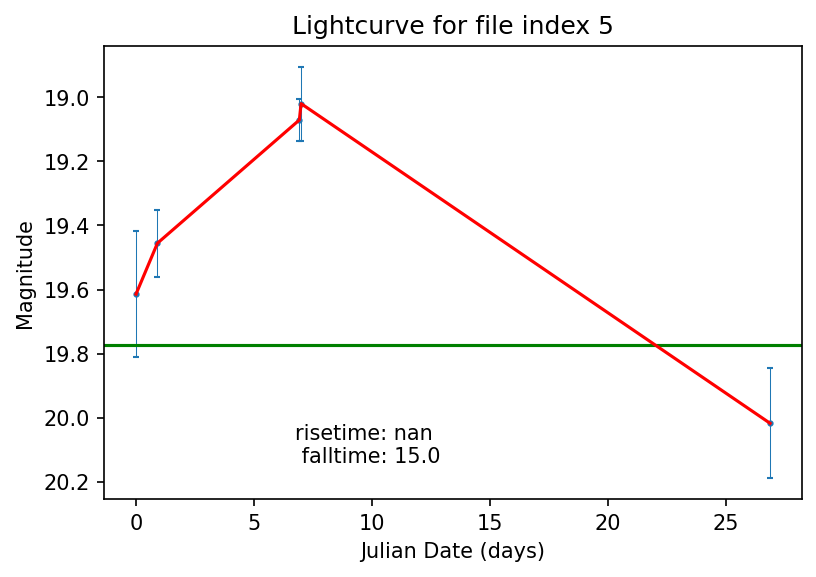

5.38713258774226


<Figure size 900x600 with 0 Axes>

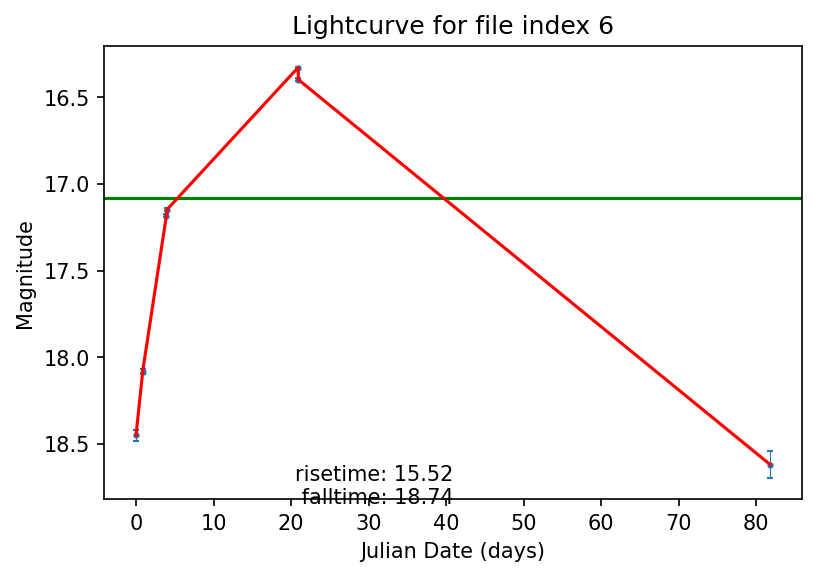

nan


<Figure size 900x600 with 0 Axes>

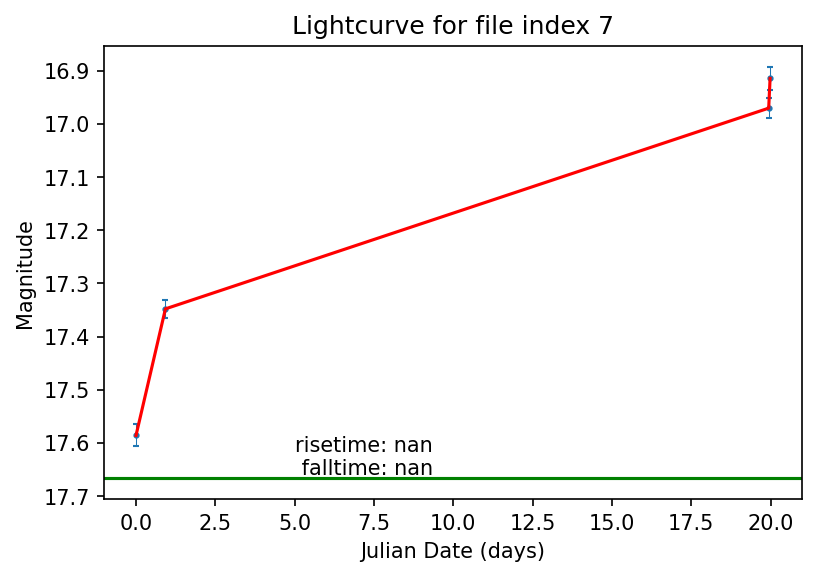

nan


<Figure size 900x600 with 0 Axes>

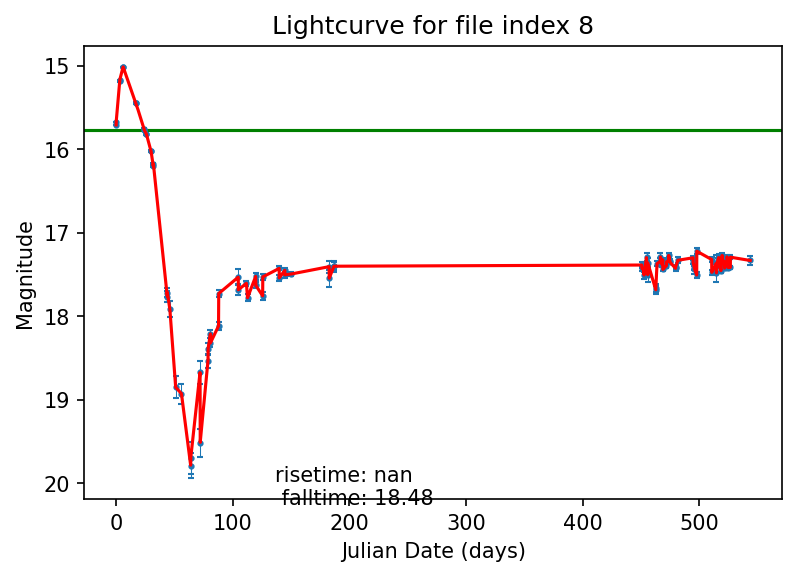

0.1430835883573766


<Figure size 900x600 with 0 Axes>

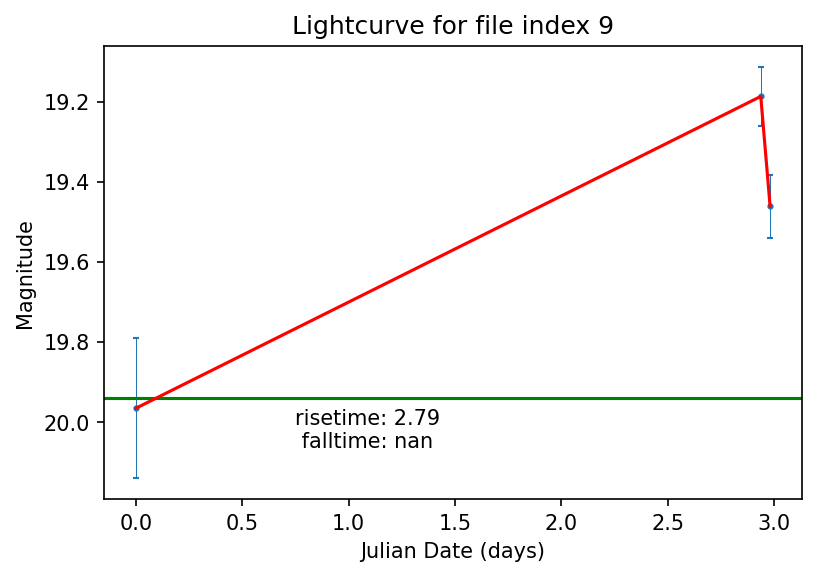

nan


<Figure size 900x600 with 0 Axes>

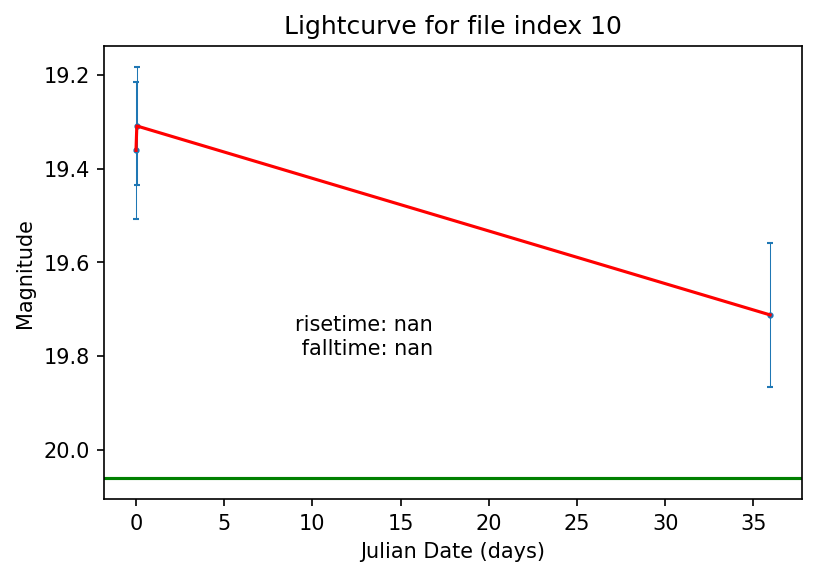

In [123]:
#create multiple lightcurves with interpolation between two file indices
start_index = 0
end_index = 10

indices = np.arange(start_index, end_index + 1, 1)

curr_index = start_index
for filename in filenames[start_index:end_index+1]:
    
    data = np.genfromtxt(filename, skip_footer=1,usecols=(0,2,3))

    plt.figure(dpi=150)


    # plot the data
    fig, ax = plt.subplots(dpi = 150)
    time_values = data[:,0]
    magnitudes = data[:,1]
    magnitude_uncertainties = data[:,2]

    x = time_values - time_values[0]
    y = magnitudes
    y_errors = magnitude_uncertainties

    plt.errorbar(x,y, yerr = y_errors, marker = "o", linestyle="none", markersize = 2, capsize = 1.5, elinewidth = 0.5)
    titletext = f"Lightcurve for file index {curr_index}"
    plt.title(titletext)
    plt.xlabel("Julian Date (days)")
    plt.ylabel("Magnitude")
    ax.invert_yaxis()

    # calculate and plot the interpolation
    interp_xvals = np.linspace(0, np.max(x), 10000)
    interp_yvals = np.interp(interp_xvals, x, y)

    plt.errorbar(interp_xvals, interp_yvals, color="r")

    peak_magnitude = np.min(y)
    max_index = np.argwhere(y == np.min(y))
    half_brightness = peak_magnitude + 2.5 * np.log10(2)
    # print(half_brightness)
    plt.axhline(half_brightness, color="g")

    good_xvals = np.array([])
    for i, xval in enumerate(interp_xvals):
        if np.abs(interp_yvals[i] - half_brightness) < 0.05:
            good_xvals = np.append(good_xvals, xval)

    #print(good_xvals)

    half_rising_JD = np.average(good_xvals[np.argwhere(good_xvals<x[max_index])[:,1]])
    half_falling_JD = np.average(good_xvals[np.argwhere(good_xvals>x[max_index])[:,1]])

    print(half_rising_JD)
    # print(f"rising: {half_rising_JD}")
    # print(f"falling: {half_falling_JD}")

    risetime = float(x[max_index]) - half_rising_JD
    falltime = half_falling_JD - float(x[max_index])

    risetime = round(risetime, 2)
    falltime = round(falltime, 2)

    # print(f"risetime: {risetime}")
    # print(f"falltime: {falltime}")


    textstr = f'risetime: {risetime} \n falltime: {falltime}'
    ax.text(np.max(x) / 4, np.max(y), textstr, verticalalignment = 'top')


    plt.show()
    curr_index += 1


In [104]:
start_index = 0
end_index = 3
filenames[start_index:end_index]

['lightcurves\\09alu_lc.dat',
 'lightcurves\\09aus_lc.dat',
 'lightcurves\\09bad_lc.dat']

In [129]:
arr = [1,2,3,4,5,6]
arr = np.array([1,2,3,4,5])

In [130]:
arr[0:3]

array([1, 2, 3])

TypeError: can only concatenate str (not "int") to str